In [16]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


# Método de punto fijo

0.8775825618903728
0.6390124941652592
0.8026851006823349
0.6947780267880062
0.7681958312820161
0.719165445942419
0.752355759421527
0.7300810631378233
0.7451203413514401
0.7350063090148431
0.7418265226432459
0.7372357254422314
0.7403296518782632
0.7382462383322335
0.7396499627696612
0.7387045393569833
0.7393414522812101
0.7389124493321031
0.739201444135799
0.739006779780813
0.7391379107622928
0.7390495805952085
0.7391090814205267
0.7390690012040115
0.7390959998357547
0.7390778132851752
0.739090063988251
0.7390818117781093


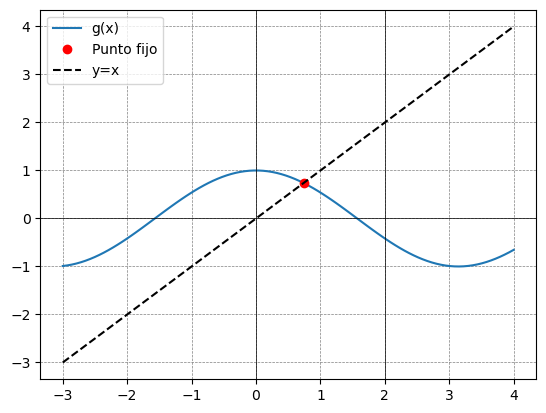

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Función de iteración para el método de punto fijo
def g(x):
    return np.cos(x)

# Configuración de la animación
fig, ax = plt.subplots()
intervalo = np.linspace(-3, 4, 100)
y_vals = g(intervalo)
line, = ax.plot(intervalo, y_vals, label='g(x)')
punto, = ax.plot([], [], 'ro', label='Punto fijo')

ax.plot(intervalo, intervalo, 'k--', label='y=x')

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.axvline(2, color='black', linewidth=0.5)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.legend()

# Inicialización de la animación
def init():
    punto.set_data([], [])
    return punto,

# Método de punto fijo
def iteracion_punto_fijo(punto_inicial, tolerancia=1e-5, max_iteraciones=100):
    punto_actual = punto_inicial
    iteraciones = [(punto_actual, g(punto_actual))]
    
    for _ in range(max_iteraciones):
        siguiente_punto = g(punto_actual)
        print(siguiente_punto)
        
        if abs(siguiente_punto - punto_actual) < tolerancia:
            break
        
        punto_actual = siguiente_punto
        iteraciones.append((siguiente_punto,  g(siguiente_punto)))

    return iteraciones

# Función de actualización para la animación
def actualizar(frame):
    x, y = frame
    punto.set_data([x], [y])
    return punto,

# Creación de la animación
punto_inicial = 0.5
iteraciones = iteracion_punto_fijo(punto_inicial)

def animar(i):
    x, y = iteraciones[i]
    punto.set_data([x], [y])
    return punto,

ani = FuncAnimation(fig, animar, frames=len(iteraciones), init_func=init, blit=True)

# Mostrar la animación en el notebook
HTML(ani.to_jshtml())


In [73]:
import numpy as np

# Función de iteración (g(x))
def g(x):
    return np.sqrt(10 / (x + 4))

# Método del punto fijo
def punto_fijo(g, p0, tol=1e-7, max_iter=100):
    punto_actual = p0
    iteraciones = [(0, p0, g(p0))]
    
    for i in range(1, max_iter + 1):
        siguiente_punto = g(punto_actual)
        iteraciones.append((i, siguiente_punto, g(siguiente_punto)))
        if abs(siguiente_punto - punto_actual) < tol:
            return iteraciones
        
        punto_actual = siguiente_punto
    
    print("Advertencia: El método no converge después de {} iteraciones".format(max_iter))
    return iteraciones

# Punto inicial y ejecución del método
punto_inicial = 1.5
iteraciones = punto_fijo(g, punto_inicial)

# Imprimir resultados con guiones
print("   n   |   p_n          |   g(p_n)")
print("--------------------------------------")
for n, p_n, g_p_n in iteraciones:
    print("{:4d} | {:.12f} | {:.12f}".format(n, p_n, g_p_n))



   n   |   p_n          |   g(p_n)
--------------------------------------
   0 | 1.500000000000 | 1.348399724926
   1 | 1.348399724926 | 1.367376371991
   2 | 1.367376371991 | 1.364957015402
   3 | 1.364957015402 | 1.365264748113
   4 | 1.365264748113 | 1.365225594161
   5 | 1.365225594161 | 1.365230575673
   6 | 1.365230575673 | 1.365229941878
   7 | 1.365229941878 | 1.365230022516
   8 | 1.365230022516 | 1.365230012256


# Método de la Bisección

In [77]:
def bisection_method(f, a, b, tolerance, max_iterations):
    a_current = a
    b_current = b

    print("   n   |  a_n          |  b_n         | c_n          |   f(c_n)")
    print("------------------------------------------------------------------")
    for i in range(1, max_iterations + 1):
        c_current = (a_current + b_current) / 2
        f_c_current = f(c_current)

        print(f"{i:5d} | {a_current:.12f} | {b_current:.12f} | {c_current:.12f} | {f_c_current:.12f}")

        if abs(f_c_current) < tolerance:
            return c_current  # Devolver c_actual como aproximación de la raíz

        if f(a_current) * f_c_current > 0:
            a_current = c_current
        else:
            b_current = c_current

    print("Advertencia: El método no converge después de", max_iterations, "iteraciones.")
    return c_current  # Devolver c_actual como última aproximación

# Ejemplo de uso
def example_function(x):
    return x**2 - 4

# Configuración de parámetros
a_initial = 0
b_initial = 3
tolerance_value = 1e-5
max_iterations_value = 100

# Llamada al método de la bisección
approximation = bisection_method(example_function, a_initial, b_initial, tolerance_value, max_iterations_value)

# Imprimir resultado
print("Aproximación de la raíz:", approximation)


   n   |  a_n          |  b_n         | c_n          |   f(c_n)
------------------------------------------------------------------
    1 | 0.000000000000 | 3.000000000000 | 1.500000000000 | -1.750000000000
    2 | 1.500000000000 | 3.000000000000 | 2.250000000000 | 1.062500000000
    3 | 1.500000000000 | 2.250000000000 | 1.875000000000 | -0.484375000000
    4 | 1.875000000000 | 2.250000000000 | 2.062500000000 | 0.253906250000
    5 | 1.875000000000 | 2.062500000000 | 1.968750000000 | -0.124023437500
    6 | 1.968750000000 | 2.062500000000 | 2.015625000000 | 0.062744140625
    7 | 1.968750000000 | 2.015625000000 | 1.992187500000 | -0.031188964844
    8 | 1.992187500000 | 2.015625000000 | 2.003906250000 | 0.015640258789
    9 | 1.992187500000 | 2.003906250000 | 1.998046875000 | -0.007808685303
   10 | 1.998046875000 | 2.003906250000 | 2.000976562500 | 0.003907203674
   11 | 1.998046875000 | 2.000976562500 | 1.999511718750 | -0.001952886581
   12 | 1.999511718750 | 2.000976562500 | 2.00024

C:\Users\usuario\AppData\Local\Temp\ipykernel_7476\240279996.py:57: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_a.set_data(a, 0)
C:\Users\usuario\AppData\Local\Temp\ipykernel_7476\240279996.py:58: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_b.set_data(b, 0)
C:\Users\usuario\AppData\Local\Temp\ipykernel_7476\240279996.py:59: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_c.set_data(c, 0)
C:\Users\usuario\AppData\Local\Temp\ipykernel_7476\240279996.py:57: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_a.set_data(a, 0)
C:\Users\usuario\AppData\Local\Temp\ipykernel_7476\240279996.py:58: MatplotlibDeprec

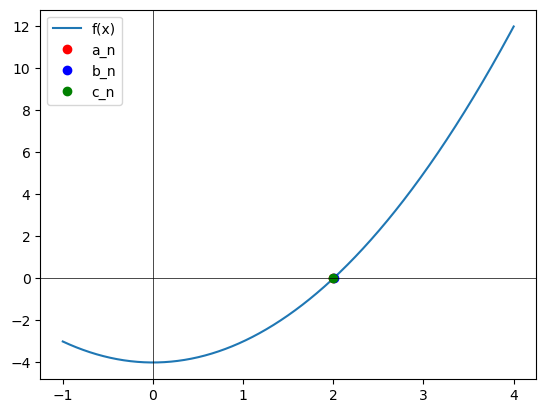

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def bisection_method(f, a, b, tolerance, max_iterations):
    a_current = a
    b_current = b

    iterations = []

    for i in range(1, max_iterations + 1):
        c_current = (a_current + b_current) / 2
        f_c_current = f(c_current)

        iterations.append((a_current, b_current, c_current))

        if abs(f_c_current) < tolerance:
            return iterations  # Devolver iteraciones

        if f(a_current) * f_c_current > 0:
            a_current = c_current
        else:
            b_current = c_current

    return iterations  # Devolver iteraciones

# Ejemplo de uso
def example_function(x):
    return x**2 - 4

# Configuración de parámetros
a_initial = 0
b_initial = 3
tolerance_value = 1e-5
max_iterations_value = 10

# Llamada al método de la bisección
iteration_data = bisection_method(example_function, a_initial, b_initial, tolerance_value, max_iterations_value)

# Crear gráfico y animación
fig, ax = plt.subplots()
x_vals = np.linspace(-1, 4, 1000)
y_vals = example_function(x_vals)

line, = ax.plot(x_vals, y_vals, label='f(x)')
point_a, = ax.plot([], [], 'ro', label='a_n')
point_b, = ax.plot([], [], 'bo', label='b_n')
point_c, = ax.plot([], [], 'go', label='c_n')

ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.legend()

def update(frame):
    a, b, c = iteration_data[frame]
    point_a.set_data(a, 0)
    point_b.set_data(b, 0)
    point_c.set_data(c, 0)
    return point_a, point_b, point_c

ani = FuncAnimation(fig, update, frames=len(iteration_data), blit=True)

# Mostrar la animación en el notebook
HTML(ani.to_jshtml())


# Método de regula falsi
**Ejercicio:** Crear un código para el método de regula falsi  modificando  el codigo de la bissección
